In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names = ['label', 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
df['length'] = df['message'].apply(len)
df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

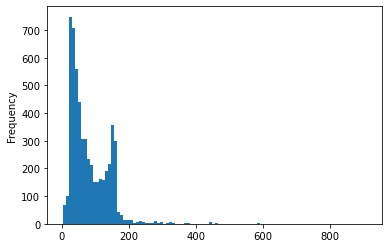

In [22]:
df['length'].plot.hist(bins=100)

In [23]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
#checking the maximum length message
#outlier

df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

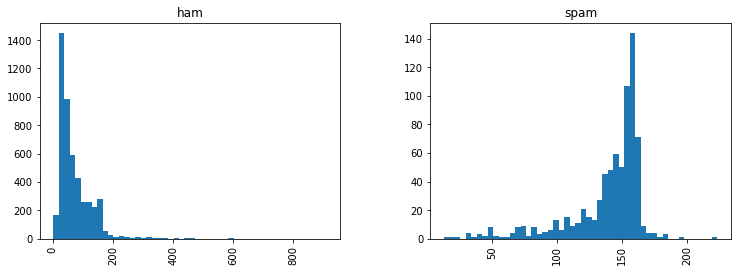

In [27]:
df.hist(column = 'length', by = 'label', bins = 50, figsize=(12,4))

Spam messages have more characters

# Text preprocessing

In [28]:
import string

In [29]:
mess = 'Sample message! Notice: it has punctuation.'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#to remove punctuation

nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
#joining elements in a list together
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [33]:
#example
'+++'.join(nopunc)

'S+++a+++m+++p+++l+++e+++ +++m+++e+++s+++s+++a+++g+++e+++ +++N+++o+++t+++i+++c+++e+++ +++i+++t+++ +++h+++a+++s+++ +++p+++u+++n+++c+++t+++u+++a+++t+++i+++o+++n'

In [37]:
# or 

#to remove punctuation and joining 

mess = 'Sample message! Notice: it has punctuation.'
nopunc = ''.join([c for c in mess if c not in string.punctuation])
nopunc

'Sample message Notice it has punctuation'

In [35]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [36]:
#removing stop words
clean_mess = [word for word in nopunc.split() if word.lower() 
             not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [38]:
#generalizing all

def preprocess_mess(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in string.punctuation])
    nostop = [word for word in nopunc.split() if word.lower()
             not in stopwords.words('english')]
    return nostop

In [40]:
df['message'].head().apply(preprocess_mess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Bag of words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow = CountVectorizer(analyzer=preprocess_mess).fit(df['message'])

In [43]:
print(len(bow.vocabulary_))

11425


Exploring one message

In [44]:
mess4 = df['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [46]:
bow4 = bow.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [47]:
bow4.shape

(1, 11425)

In [49]:
bow.get_feature_names_out()[4068]

'U'

In [50]:
bow.get_feature_names_out()[9554]

'say'

In [51]:
messages_bow = bow.transform(df['message'])

In [52]:
print('Shape of matrix', messages_bow.shape)

Shape of matrix (5572, 11425)


In [53]:
#non zero
messages_bow.nnz

50548

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
tfidf = TfidfTransformer().fit(messages_bow)

In [57]:
#checking for message 4
tfidf4 = tfidf.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [58]:
#converting entire bow to tfidf
messages_tfidf = tfidf.transform(messages_bow)

# Using Naive bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
model = MultinomialNB().fit(messages_tfidf, df['label'])

In [61]:
model.predict(tfidf4)[0]

'ham'

In [63]:
df['label'][3]

'ham'

In [64]:
pred = model.predict(messages_tfidf)
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

we trained on the entire dataset

Splitting into train and text

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],
                                                   df['label'], test_size=0.30, random_state=101)

Using data pipeline feature to do the process back to back

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess_mess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess_mess at 0x000001DBBC0E81F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [71]:
predictions = pipeline.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672

